In [31]:
#What explains variation in the cost of insurance premiums? 
# read in the data
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
import category_encoders as ce
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
from pdpbox import pdp, info_plots



df = pd.read_csv('insurance_premiums.csv')

In [2]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [32]:
#pull descriptives 
df.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


In [33]:
df['sex'].value_counts(normalize = True)

male      0.505232
female    0.494768
Name: sex, dtype: float64

In [34]:
df['smoker'].value_counts(normalize = True)

no     0.795217
yes    0.204783
Name: smoker, dtype: float64

In [35]:
df['region'].value_counts(normalize = True)

southeast    0.272048
northwest    0.242900
southwest    0.242900
northeast    0.242152
Name: region, dtype: float64

###Exploratory data analysis

The dataset has 1338 observations. The average age of persons in this dataset is about 39 years, with the youngest person at 18 and oldest person at 64. The dataset is roughly evenly distributed between individuals coded as "female" and "male." The minimum total paid in insurance premiums is about $1100, while the maximum is about $64000. On average, payers pay about $13,000 in premiums. The standard deviation of premiums is about $12,000, indicating wide variation between payers in the dataset. 80% of individuals in this dataset do not smoke, and the dataset is roughly evenly distributed throughout the United States regions. The average BMI is 31 and ranges from about 16 to about 53.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f981d52deb0>]],
      dtype=object)

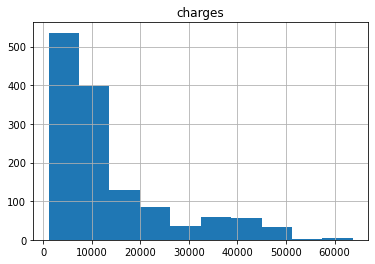

In [171]:

#graph the charges to visualize variation
df.hist('charges')

##More exploratory data analysis
The figure above shows that most payers pay up to and slightly over $10,000 in insurance premiums, with fewer payers paying more than $10,000. 

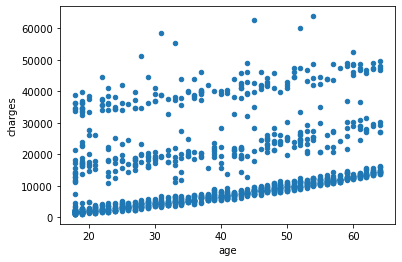

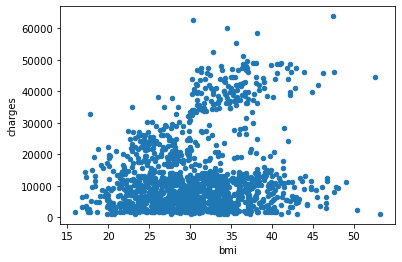

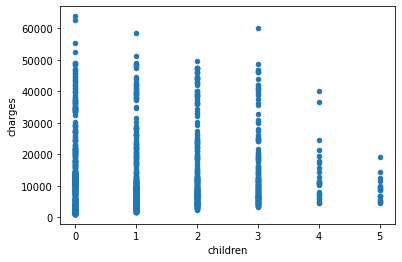

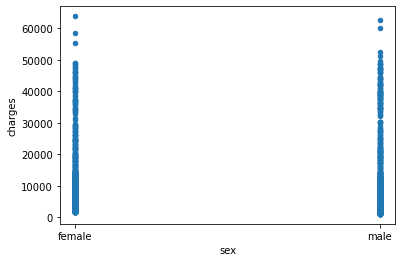

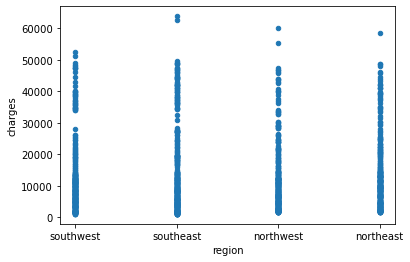

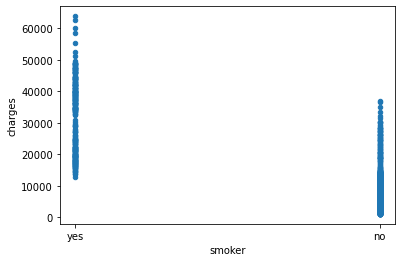

In [8]:
#plot variables against each other to determine possible correlations
age_charges = df.plot.scatter(x = 'age', y='charges')
bmi_charges = df.plot.scatter(x = 'bmi', y='charges')
children_charges = df.plot.scatter(x = 'children', y='charges')
sex_charges = df.plot.scatter(x= 'sex', y= 'charges')
region_charges = df.plot.scatter(x= 'region', y= 'charges')
smoker_charges = df.plot.scatter(x= 'smoker', y= 'charges')


###Even more exploratory data analysis

These graphs suggest a correlation between age and insurance premium, where higher ages are associated with higher premiums. There does not appear to be a clear correlation between premiums and BMI. People with more children do not appear to pay more in insurance premiums, as people with varying numbers of children are spread out throughout the outcome distribution. There do not appear to be discrepancies between those coded as 'male' and 'female' and the range of their insurance premiums, nor do there appear to be major discrepancies between regions. Smokers are concentrated in higher premiums than non-smokers. Because this is a small dataset and the outcome variable skews in one direction, one risk is that including all of the features in the dataset will result in an overly fitted model.  

In [36]:
#in order to examine correlations between binary variables and charges
#create variables that take numerical values to represent sex, smoker, and region
#Because there are only 3 variables to recode, I do not use pipelines here. Because I am not target encoding,
#I am also just coding all of these variables at once
le = LabelEncoder()

In [37]:
df['sex_numeric'] = le.fit_transform(df['sex'])
df['sex_numeric']

0       0
1       1
2       1
3       1
4       1
       ..
1333    1
1334    0
1335    0
1336    0
1337    0
Name: sex_numeric, Length: 1338, dtype: int64

In [38]:
df['smoker_numeric'] = le.fit_transform(df['smoker'])
df['smoker_numeric']

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoker_numeric, Length: 1338, dtype: int64

In [39]:
df['region_numeric'] = le.fit_transform(df['region'])
df['region_numeric']

0       3
1       2
2       2
3       1
4       1
       ..
1333    1
1334    0
1335    2
1336    3
1337    1
Name: region_numeric, Length: 1338, dtype: int64

In [8]:
#examine bivariate correlations
df.corr()

,age,bmi,children,charges,sex_numeric,smoker_numeric,region_numeric
age,1.000000,0.109272,0.042469,0.299008,-0.020856,-0.025019,0.002127
bmi,0.109272,1.000000,0.012759,0.198341,0.046371,0.003750,0.157566
children,0.042469,0.012759,1.000000,0.067998,0.017163,0.007673,0.016569
charges,0.299008,0.198341,0.067998,1.000000,0.057292,0.787251,-0.006208
sex_numeric,-0.020856,0.046371,0.017163,0.057292,1.000000,0.076185,0.004588
smoker_numeric,-0.025019,0.003750,0.007673,0.787251,0.076185,1.000000,-0.002181
region_numeric,0.002127,0.157566,0.016569,-0.006208,0.004588,-0.002181,1.000000


##Still more exploratory data analysis

Between these variables, there appear to be moderately strong correlations between age and charges (30%), such that higher age is moderately associated with higher charges. Higher BMI is also somewhat associated with higher charges, but does not appear to be as important as age. Smoker status is highly correlated with higher charges (78%). Therefore, in fine-tuning the model, I will pay special attention to how removing BMI, region, and parental status improves the test score. 

In [40]:
#shuffle the dataset
df = df.sample(df.shape[0], random_state=100)

In [41]:
#declare explanatory variables and outcome variable
x = df.drop (['sex', 'smoker', 'region', 'charges'], axis = 1)
y = df['charges']

In [54]:
#create training, validation, and test datasets 

#training data is 80% of dataset
training_cutoff = int(df.shape[0]*.8)

#training data for explanatory/outcome variables and test for exlanatory/outcome variables is 80% of data set and 20% of dataset respectively
x_train = x[:training_cutoff].copy()
y_train = y[:training_cutoff].copy()

#validation data is 20% of training data 
xval = int(x_train.shape[0]*.2)
yval = int(y_train.shape[0]*.2)

x_val = x_train[:xval].copy()
y_val = y_train[:yval].copy()

#test data
x_test = x[training_cutoff:].copy()
y_test = y[training_cutoff:].copy()




,age,bmi,children,sex_numeric,smoker_numeric,region_numeric
633,40,22.705,2,1,0,0
80,31,26.885,1,1,0,0
316,50,32.205,0,1,0,1
942,18,40.185,0,0,0,0
1295,20,22.000,1,1,0,3
...,...,...,...,...,...,...
802,21,22.300,1,1,0,3
53,36,34.430,0,1,1,2
350,57,23.180,0,0,0,1
79,41,32.965,0,0,0,1


In [43]:
gbm = GradientBoostingRegressor()

In [44]:
output = gbm.fit(x_train, y_train)

In [45]:
print(f"Train score: {gbm.score(x_train, y_train)}, Validation Score: {gbm.score(x_val, y_val)}")

Train score: 0.8991381517336, Validation Score: 0.9384658675164022


In [46]:
importances = pd.DataFrame({
    'Column': x.columns,
    'Importance': gbm.feature_importances_
}).sort_values(by='Importance', ascending=False)

importances

,Column,Importance
4,smoker_numeric,0.679839
1,bmi,0.185215
0,age,0.117653
2,children,0.012186
5,region_numeric,0.004855
3,sex_numeric,0.000252


##Interpreting feature importances

As expected, whether an individual smokes has the greatest importance in explaining variation in the amount of dollars spent in insurance premiums. BMI is more important and age is less important than initially thought, based on the correlational analysis and plots. Still, this suggests that the R-squared statistics could be improved by droppping children, region, and classified sex. 

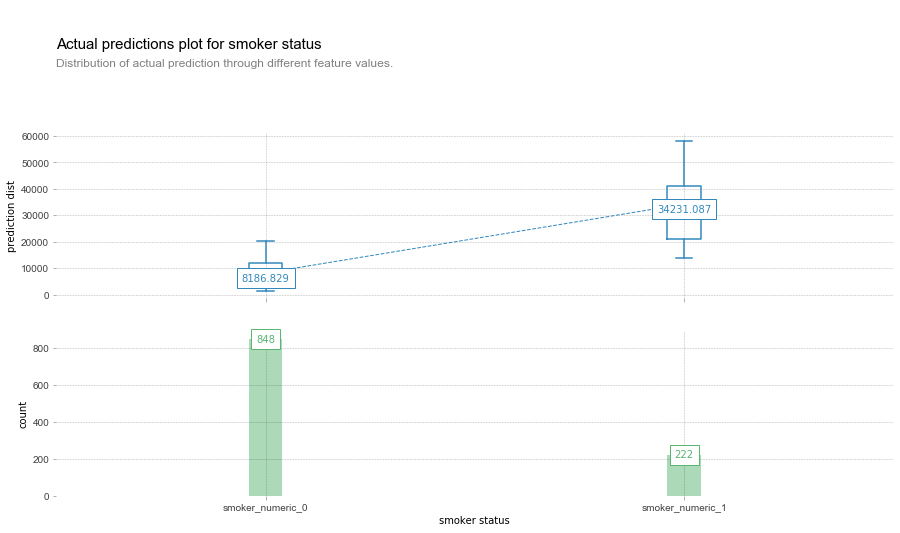

In [47]:
##Plotting the predicted values

# this chart summarizes the model predictions made for each unique value in the day_of_week column
fig, axes, summary_df = info_plots.actual_plot(
    # notice these options -- accesing the appropriate parts of our pipeline to get the data setup
    model=output, X=x_train, 
    feature='smoker_numeric', feature_name = 'smoker status', predict_kwds={}
)

###Interpreting the predicted values

Plotting the predicted values suggests that moving from non-smoker to smoker results in about a $26,000 increase in insurance premiums paid. This suggests that becoming a smoker dramatically increases the amount of dollars one is likely to pay in insurance premiums. However, there are only 222 smokers in the dataset, so caution is warranted about the small sample. 

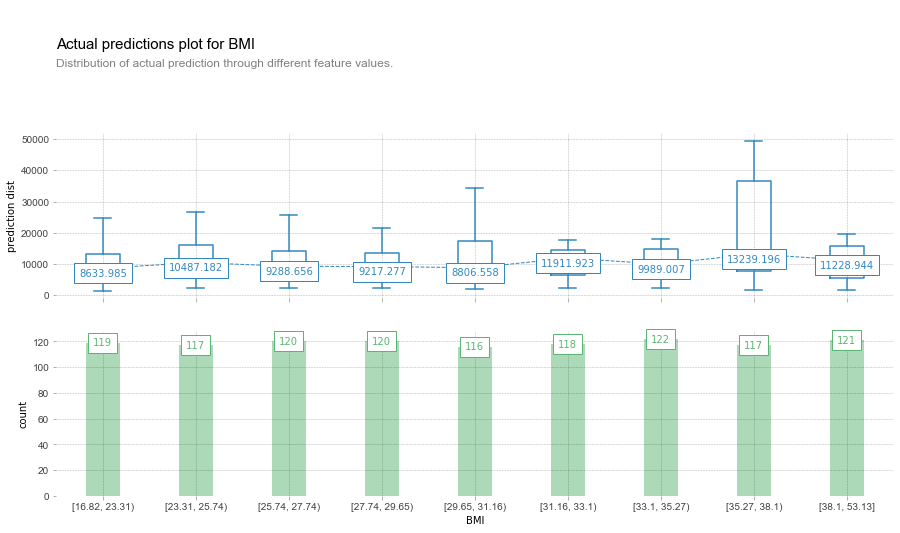

In [48]:
##Plotting the predicted values

# this chart summarizes the model predictions made for each unique value in the day_of_week column
fig, axes, summary_df = info_plots.actual_plot(
    # notice these options -- accesing the appropriate parts of our pipeline to get the data setup
    model=output, X=x_train, 
    feature='bmi', feature_name = 'BMI', predict_kwds={}
)

###Interpreting the predicted values

When BMI is considered, the plot above shows that there are generally few dramatic fluctuations in insurance premiums paid for each increase in BMI, but those with BMI between 35.27-38.21 pay on average about $13000 in insurance premiums. This graph does not suggest that every increase in BMI results in a dramatic increase in insurance premiums paid, however. 

In [49]:
#shuffle again to try to improve the model
df = df.sample(df.shape[0], random_state=100)

#declare explanatory variables and outcome variable
x2 = df.drop (['sex', 'sex_numeric', 'charges', 'smoker', 'region','region_numeric','children'], axis = 1)
y2 = df['charges']


#training data is 80% of dataset
training_cutoff = int(df.shape[0]*.8)

#training data for explanatory/outcome variables and test for exlanatory/outcome variables is 80% of data set and 20% of dataset respectively
x_train2 = x2[:training_cutoff].copy()
y_train2 = y2[:training_cutoff].copy()

#validation data is 20% of training data 
xval2 = int(x_train.shape[0]*.2)
yval2 = int(y_train.shape[0]*.2)

x_val2 = x_train2[:xval].copy()
y_val2 = y_train2[:yval].copy()


gbm.fit(x_train2, y_train2)

print(f"Train score: {gbm.score(x_train2, y_train2)}, Validation Score: {gbm.score(x_val2, y_val2)}")

Train score: 0.8994356595243657, Validation Score: 0.8979838372609565


###Interpreting and validating whether changes to the model improved changes to the scores
Dropping sex classification, region, and children did not meaningfully improve the model, as the scores are about the same at nearly 90% on the training data and about 90% on the validation data. In fact, the validation score went down slightly. 

In [51]:
##testing the original model with the test data

gbm.fit(x_train, y_train)

GradientBoostingRegressor()

In [55]:
print(f"Train score: {gbm.score(x_train, y_train)}, Test Score: {gbm.score(x_test, y_test)}")

Train score: 0.8991381517336, Test Score: 0.8851759115525274


###Post-mortem analysis
Overall, this analysis was meant to be simple and offer cursory inferences with a small dataset. To the extent that the model scores could be higher, it is possible that interactions between age, bmi, and smoker status explain more variation in the amount of insurance premiums paid. It is also possible that data not accounted for here also explains more variation in the amount of insurance premiums paid, such as household income. Generally, however, scores over over 80% indicate that these features, age, bmi, and smoker status, explain variation in insurance premiums paid fairly well. 